In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [43]:
pd_random = pd.read_csv('res_energy/results_random/avg_acc_vs_energy_time.csv')
acc_random = pd_random['accuracy']
energy_random = pd_random['cumulative_energy']
time_random = pd_random['cumulative_time']

In [44]:
pd_main = pd.read_csv('res_energy/results/avg_acc_vs_energy_time.csv')
acc_main = pd_main['accuracy']
energy_main = pd_main['cumulative_energy']
time_main = pd_main['cumulative_time']

In [45]:
pd_safa = pd.read_csv('res_energy/safa_results2/average_acc_energy_time.csv')
acc_safa = pd_safa['accuracy']
energy_safa = pd_safa['cumulative_energy']
time_safa = pd_safa['cumulative_time']

In [46]:
pd_sync = pd.read_csv('res_energy/sync_results/average_acc_energy_time.csv')
acc_sync = pd_sync['accuracy']
energy_sync = pd_sync['cumulative_energy']
time_sync = pd_sync['cumulative_time']

In [47]:
pd_cotaf = pd.read_csv('res_energy/cotaf_results/round_metrics.csv')
acc_cotaf = pd_cotaf['accuracy']
energy_cotaf = pd_cotaf['cumulative_energy']
time_cotaf = pd_cotaf['cumulative_time']

In [48]:
cotaf_data = pd.read_csv('res/cotaf_results/accuracy_results.csv')
cotaf_acc = np.array(cotaf_data['accuracy'])

In [49]:
window_size = 8
poly_order = 1

acc_main_sav= savgol_filter(acc_main, window_size, poly_order)
acc_random_sav = savgol_filter(acc_random, window_size, poly_order)
acc_safa_sav = savgol_filter(acc_safa, window_size, poly_order)
acc_sync_sav = savgol_filter(acc_sync, window_size, poly_order)
# acc_cotaf_sav = savgol_filter(acc_cotaf, window_size, poly_order)
acc_cotaf_sav = savgol_filter(cotaf_acc, window_size, poly_order)

energy_main_sav= savgol_filter(energy_main, window_size, poly_order)
energy_random_sav = savgol_filter(energy_random, window_size, poly_order)
energy_safa_sav = savgol_filter(energy_safa, window_size, poly_order)
energy_sync_sav = savgol_filter(energy_sync, window_size, poly_order)
energy_cotaf_sav = savgol_filter(energy_cotaf, window_size, poly_order)


time_main_sav= savgol_filter(time_main, window_size, poly_order)
time_random_sav = savgol_filter(time_random, window_size, poly_order)
time_safa_sav = savgol_filter(time_safa, window_size, poly_order)
time_sync_sav = savgol_filter(time_sync, window_size, poly_order)
time_cotaf_sav = savgol_filter(time_cotaf, window_size, poly_order)

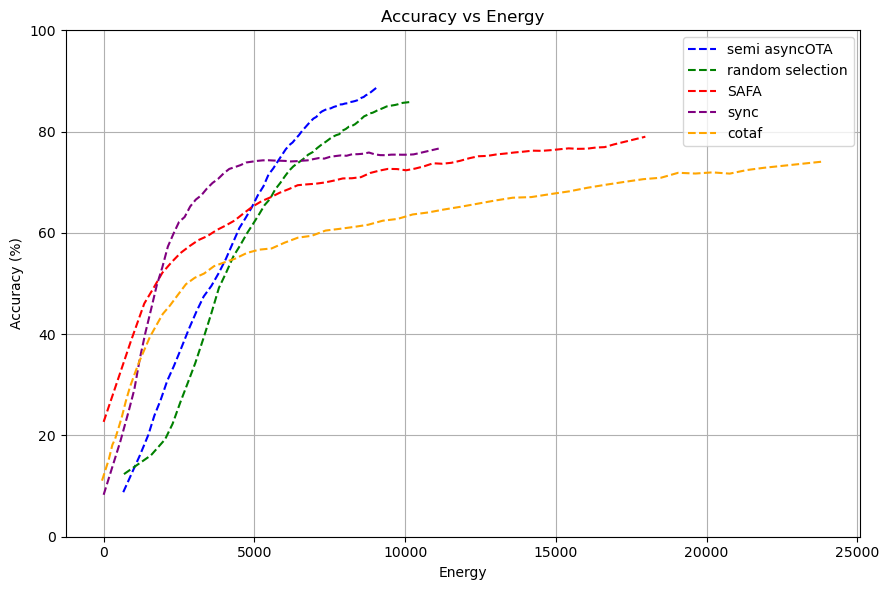

In [59]:
methods = [
    ('semi asyncOTA', acc_main_sav, energy_main_sav),
    ('random selection', acc_random_sav, energy_random_sav),
    ('SAFA', acc_safa_sav, energy_safa_sav),
    ('sync', acc_sync_sav, energy_sync_sav),
    ('cotaf', acc_cotaf_sav, energy_cotaf_sav),
]

colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(9, 6))

for (label, data, x), color in zip(methods, colors):
    plt.plot(x, data, linestyle='--', color=color, label=label)

plt.title("Accuracy vs Energy")
plt.xlabel("Energy")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

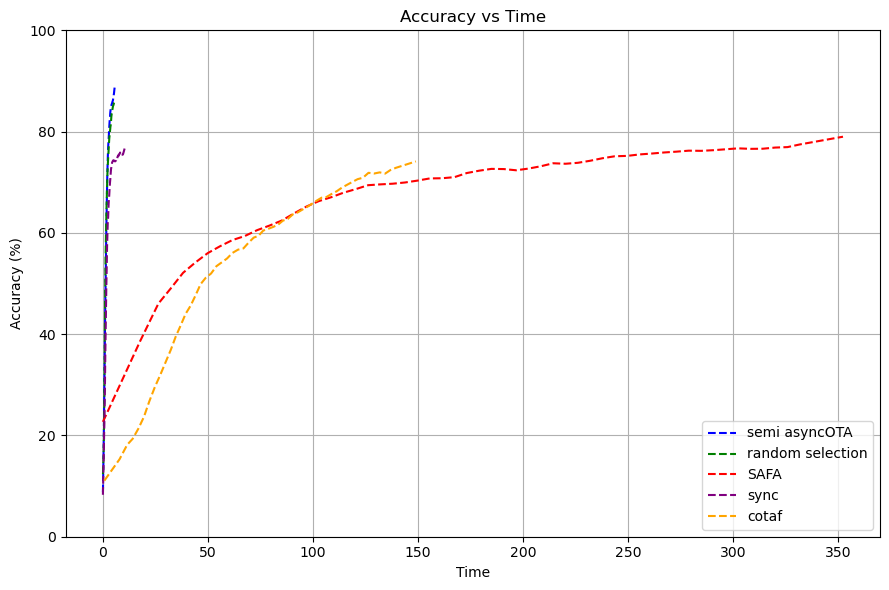

In [60]:
methods = [
    ('semi asyncOTA', acc_main_sav, time_main_sav),
    ('random selection', acc_random_sav, time_random_sav),
    ('SAFA', acc_safa_sav, time_safa_sav),
    ('sync', acc_sync_sav, time_sync_sav),
    ('cotaf', acc_cotaf_sav, time_cotaf_sav),
]

colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(9, 6))

for (label, data, x), color in zip(methods, colors):
    plt.plot(x, data, linestyle='--', color=color, label=label)

plt.title("Accuracy vs Time")
plt.xlabel("Time")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
eval_rounds = [5 * i for i in range(60)]

ValueError: x and y must have same first dimension, but have shapes (60,) and (61,)

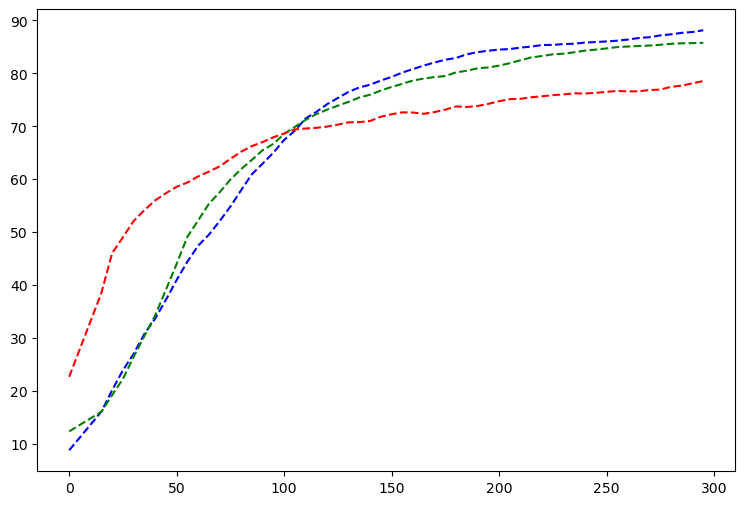

In [62]:
methods = [
    ('semi asyncOTA', acc_main_sav[:-2]),
    ('random selection', acc_random_sav[:-2]),
    ('SAFA', acc_safa_sav[:-1]),
    ('sync', acc_sync_sav),
    ('cotaf', acc_cotaf_sav[:-1]),
]

colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(9, 6))

for (label, data), color in zip(methods, colors):
    plt.plot(eval_rounds, data, linestyle='--', color=color, label=label)

plt.title("Accuracy vs Energy")
plt.xlabel("Energy")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()